In [12]:
from selenium import webdriver
from selenium_stealth import stealth
from selenium.webdriver.common.by import By
from tqdm import tqdm
import time
import json
import requests

In [13]:
options = webdriver.ChromeOptions()
options.add_argument("start-maximized")

# options.add_argument("--headless")

options.add_experimental_option("excludeSwitches", ["enable-automation"])
options.add_experimental_option('useAutomationExtension', False)
driver = webdriver.Chrome(options=options)

stealth(driver,
        languages=["en-US", "en"],
        vendor="Google Inc.",
        platform="Win32",
        webgl_vendor="Intel Inc.",
        renderer="Intel Iris OpenGL Engine",
        fix_hairline=True,
        )

In [2]:
with open('data.json', 'r') as f:
    data = json.load(f)

In [96]:
for k, v in tqdm(data.copy().items()):
    url = f'https://explorer.multiversx.com/nfts/{k}'
    driver.get(url)
    time.sleep(1)
    for row in driver.find_elements(By.CLASS_NAME, 'detail-item'):
        l = row.text.split('\n')
        if l[0] == 'Nonce':
            data[k]['nonce'] = int(l[1])
        if l[0] == 'Assets':
            data[k]['metadata'] = l[2]
            data[k]['dynamic'] = l[3]

100%|██████████| 162/162 [05:04<00:00,  1.88s/it]


In [97]:
with open('data.json', 'w') as f:
    json.dump(data, f, indent=4)

In [14]:
for k, v in tqdm(data.copy().items()):
    if data[k].get('nonce') is None:
        continue
    if data[k].get('metadata_dict') is not None:
        continue
    else:
        time.sleep(1)
        r = requests.get(data[k]['metadata'])
        data[k]['metadata_dict'] = r.json()
    if data[k].get('dynamic_dict') is not None:
        continue
    else:
        time.sleep(1)
        r = requests.get(data[k]['dynamic'])
        data[k]['dynamic_dict'] = r.json()

100%|██████████| 162/162 [06:24<00:00,  2.37s/it]


In [15]:
with open('data.json', 'w') as f:
    json.dump(data, f, indent=4)

In [17]:
import matplotlib.pyplot as plt

In [28]:
l = []
for k, v in data.items():
    try:
        price = v['price']
        level = v['dynamic_dict']['starLevel']
        weapon = v['metadata_dict']['name']
        code = k
        l.append((price, level, weapon, code))
    except:
        print(k)

CRWEAPONS-e5ab49-05e4
CRWEAPONS-e5ab49-05bb
CRWEAPONS-e5ab49-033a
CRWEAPONS-e5ab49-0333


In [30]:
import pandas as pd

df = pd.DataFrame(l, columns=['price', 'level', 'weapon', 'code'])

In [38]:
df1 = df[df['level'] == 1]
df1 = df1.sort_values(by='price')
df1

,price,level,weapon,code
0,0.19,1,Railgun-X,CRWEAPONS-e5ab49-04e1
1,0.20,1,Blaster-X,CRWEAPONS-e5ab49-051a
2,0.21,1,Boomstick-X,CRWEAPONS-e5ab49-01e2
3,0.25,1,Blaster-X,CRWEAPONS-e5ab49-0673
4,0.26,1,Blaster-X,CRWEAPONS-e5ab49-06f6
...,...,...,...,...
136,2.10,1,Railgun-X,CRWEAPONS-e5ab49-fb
137,2.10,1,Railgun-X,CRWEAPONS-e5ab49-0107
138,2.10,1,Tesla Gun X,CRWEAPONS-e5ab49-a5
150,4.00,1,Tesla Gun X,CRWEAPONS-e5ab49-0232


In [39]:
df2 = df[df['level'] == 2]
df2 = df2.sort_values(by='price')
df2

,price,level,weapon,code
10,0.30,2,Blaster-X,CRWEAPONS-e5ab49-074f
15,0.35,2,Blaster-X,CRWEAPONS-e5ab49-07a4
23,0.40,2,Railgun-X,CRWEAPONS-e5ab49-0709
25,0.42,2,Tesla Gun X,CRWEAPONS-e5ab49-0759
28,0.49,2,Tesla Gun X,CRWEAPONS-e5ab49-06cd
...,...,...,...,...
128,2.00,2,Boomstick-X,CRWEAPONS-e5ab49-68
130,2.00,2,Tesla Gun X,CRWEAPONS-e5ab49-0341
135,2.10,2,Tesla Gun X,CRWEAPONS-e5ab49-9d
131,2.10,2,Boomstick-X,CRWEAPONS-e5ab49-0279


In [40]:
df3 = df[df['level'] == 3]
df3 = df3.sort_values(by='price')
df3

,price,level,weapon,code
85,1.00,3,Railgun-X,CRWEAPONS-e5ab49-07c3
95,1.00,3,Tesla Gun X,CRWEAPONS-e5ab49-0628
99,1.10,3,Railgun-X,CRWEAPONS-e5ab49-06aa
100,1.10,3,Railgun-X,CRWEAPONS-e5ab49-031c
107,1.35,3,Blaster-X,CRWEAPONS-e5ab49-076a
108,1.35,3,Tesla Gun X,CRWEAPONS-e5ab49-06b0
110,1.45,3,Blaster-X,CRWEAPONS-e5ab49-04c6
114,1.50,3,Railgun-X,CRWEAPONS-e5ab49-048d
116,1.60,3,Boomstick-X,CRWEAPONS-e5ab49-076e
118,1.65,3,Mortar Gun X,CRWEAPONS-e5ab49-05a7


In [41]:
df4 = df[df['level'] == 4]
df4 = df4.sort_values(by='price')
df4

,price,level,weapon,code
142,2.70,4,Railgun-X,CRWEAPONS-e5ab49-062d
144,3.20,4,Blaster-X,CRWEAPONS-e5ab49-0775
145,3.27,4,Tesla Gun X,CRWEAPONS-e5ab49-0122
146,3.27,4,Blaster-X,CRWEAPONS-e5ab49-029f
149,4.00,4,Tesla Gun X,CRWEAPONS-e5ab49-04a0
152,4.49,4,Tesla Gun X,CRWEAPONS-e5ab49-0623
153,5.00,4,Tesla Gun X,CRWEAPONS-e5ab49-04f3
154,5.50,4,Mortar Gun X,CRWEAPONS-e5ab49-0581
155,9.59,4,Railgun-X,CRWEAPONS-e5ab49-033c
156,11.00,4,Railgun-X,CRWEAPONS-e5ab49-4c


In [42]:
df5 = df[df['level'] == 5]
df5 = df5.sort_values(by='price')
df5

,price,level,weapon,code
157,18.9,5,Boomstick-X,CRWEAPONS-e5ab49-0508


In [43]:
df6 = df[df['level'] == 6]
df6 = df6.sort_values(by='price')
df6

,price,level,weapon,code


In [19]:
l = [i for i in l if i[0] < 1.5]

In [20]:
[x for x in l if x[1] > 1]

[(0.3, 2, 'Blaster-X', 'CRWEAPONS-e5ab49-074f'),
 (0.35, 2, 'Blaster-X', 'CRWEAPONS-e5ab49-07a4'),
 (0.4, 2, 'Railgun-X', 'CRWEAPONS-e5ab49-0709'),
 (0.42, 2, 'Tesla Gun X', 'CRWEAPONS-e5ab49-0759'),
 (0.5, 2, 'Railgun-X', 'CRWEAPONS-e5ab49-05c3'),
 (0.49, 2, 'Tesla Gun X', 'CRWEAPONS-e5ab49-06cd'),
 (0.49, 2, 'Railgun-X', 'CRWEAPONS-e5ab49-045f'),
 (0.532, 2, 'Railgun-X', 'CRWEAPONS-e5ab49-0328'),
 (0.55, 2, 'Boomstick-X', 'CRWEAPONS-e5ab49-0753'),
 (0.55, 2, 'Boomstick-X', 'CRWEAPONS-e5ab49-0760'),
 (0.55, 2, 'Railgun-X', 'CRWEAPONS-e5ab49-076b'),
 (0.55, 2, 'Railgun-X', 'CRWEAPONS-e5ab49-0519'),
 (0.55, 2, 'Blaster-X', 'CRWEAPONS-e5ab49-0657'),
 (0.55, 2, 'Tesla Gun X', 'CRWEAPONS-e5ab49-0663'),
 (0.55, 2, 'Boomstick-X', 'CRWEAPONS-e5ab49-0637'),
 (0.55, 2, 'Blaster-X', 'CRWEAPONS-e5ab49-0583'),
 (0.587, 2, 'Boomstick-X', 'CRWEAPONS-e5ab49-04ec'),
 (0.6, 2, 'Blaster-X', 'CRWEAPONS-e5ab49-04a5'),
 (0.6, 2, 'Boomstick-X', 'CRWEAPONS-e5ab49-a1'),
 (0.61, 2, 'Tesla Gun X', 'CRWEAPONS-e5

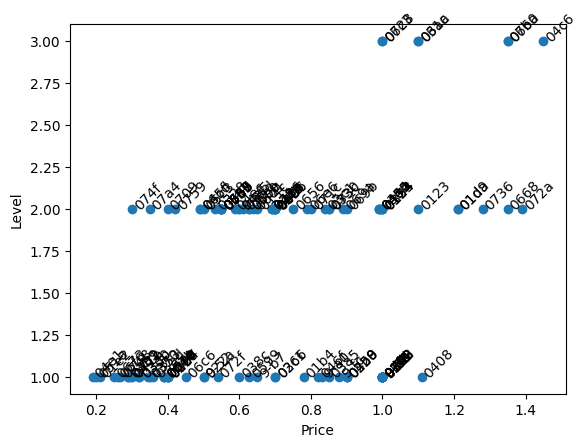

In [23]:
plt.scatter([x[0] for x in l], [x[1] for x in l])
plt.xlabel('Price')
plt.ylabel('Level')
# label dot with code with angolo 45 degree
for i in l:
    plt.annotate(i[3][-4:], (i[0], i[1]), rotation=45)
plt.show()

In [27]:
for x in l:
    if x[1] > 2:
        print(x)

(1.0, 3, 'Railgun-X', 'CRWEAPONS-e5ab49-07c3')
(1.0, 3, 'Tesla Gun X', 'CRWEAPONS-e5ab49-0628')
(1.1, 3, 'Railgun-X', 'CRWEAPONS-e5ab49-06aa')
(1.1, 3, 'Railgun-X', 'CRWEAPONS-e5ab49-031c')
(1.35, 3, 'Blaster-X', 'CRWEAPONS-e5ab49-076a')
(1.35, 3, 'Tesla Gun X', 'CRWEAPONS-e5ab49-06b0')
(1.45, 3, 'Blaster-X', 'CRWEAPONS-e5ab49-04c6')


In [26]:
for x in l:
    if x[1] > 1 and x[0] < 0.5:
        print(x)

(0.3, 2, 'Blaster-X', 'CRWEAPONS-e5ab49-074f')
(0.35, 2, 'Blaster-X', 'CRWEAPONS-e5ab49-07a4')
(0.4, 2, 'Railgun-X', 'CRWEAPONS-e5ab49-0709')
(0.42, 2, 'Tesla Gun X', 'CRWEAPONS-e5ab49-0759')
(0.49, 2, 'Tesla Gun X', 'CRWEAPONS-e5ab49-06cd')
(0.49, 2, 'Railgun-X', 'CRWEAPONS-e5ab49-045f')
